In [17]:
import cv2
import pylab as plt
import numpy as np

%matplotlib inline

In [2]:
img = cv2.imread('QR.png')

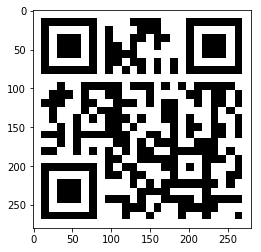

In [3]:
plt.imshow(img)

In [4]:
# 获得灰度图
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 高斯滤波=>消除部分噪声
img_gb = cv2.GaussianBlur(img_gray, (5,5), 0)
# Canny边缘检测
edges = cv2.Canny(img_gray, 100, 200)

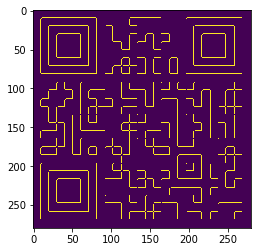

In [5]:
plt.imshow(edges)

[10, 60, 67]


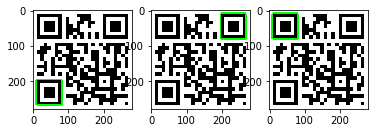

In [12]:
img_fc, contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
hierarchy = hierarchy[0]
found = []
for i in range(len(contours)):
    k = i
    c = 0
    while hierarchy[k][2] != -1:
        k = hierarchy[k][2]
        c += 1
    if c >= 5:
        found.append(i)
print(found)
j = 1
for i in found:
    img_dc = img.copy()
    cv2.drawContours(img_dc, contours, i, (0, 255, 0), 3)
    plt.subplot(130+j)
    plt.imshow(img_dc)
    j+=1

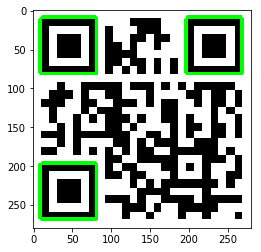

In [15]:
img_dc = img.copy()
for i in found:
    cv2.drawContours(img_dc, contours, i, (0, 255, 0), 3)
    
plt.imshow(img_dc)

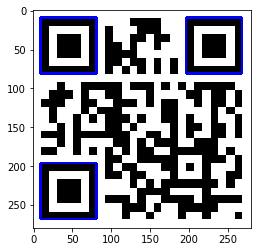

In [18]:
draw_img = img.copy()
for i in found:
    rect = cv2.minAreaRect(contours[i])
    box = cv2.boxPoints(rect)
    box = np.int64(box)
    cv2.drawContours(draw_img, [box], 0, (0, 0, 255), 2)
plt.imshow(draw_img)

In [51]:
contour_all = []
for i in found:
    for j in contours[i]:
        contour_all.append(j)
contour_all = np.array(contour_all)

In [52]:
rect = cv2.minAreaRect(contour_all)
box = cv2.boxPoints(rect)
box = np.array(box)

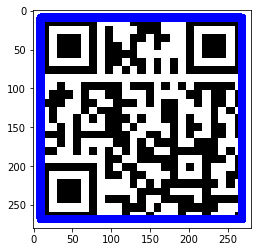

In [53]:
res_img = img.copy()
cv2.polylines(res_img, np.int32([box]), True, (0, 0, 255), 10)
plt.imshow(res_img)

In [62]:
roi = img_gray[9:268, 9:268]
binary=roi.copy()
ret,binary=cv2.threshold(binary,127,255,cv2.THRESH_BINARY)

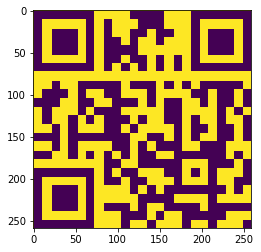

In [63]:
plt.imshow(binary)